# <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 3 - Machine Learning using Tensorflow and Google Colab</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Sunday, October 18th submitted via Canvas by 11:59 pm</p>

This will be a in-class project done in teams of 2. 

In this Project, we will work with CIFAR10 image dataset. 
The starter code to download the database using keras is given below. 
Test the project on Google Colab running on a CPU, GPU and TPU
 

### In every line of code, please write a comment to briefly explain what that line is doing.
Your grades will be based on your understanding of the code you write! 

# Task 1
Convert the features in a form that can be given as input to tensorflow library/functions

In this task you will perform data augmentation. That is, pre-process the data to make the model more robust. Experiment with common data augmentation techniques like rotation, translation, horizontal-flips, scaling and histogram equalization. 

**TEAM MEMBERS: AMULYA SARIDEY & MOUNIKA TARIGOPULA**
**UT EIDS: ncs979 & mt37858**

In [1]:
# import packages and libraries for project
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical

In [2]:
print(tf.__version__)

2.3.0


In [ ]:
# verify that GPU device is available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from keras.datasets import cifar10
# loading  the cifar10 data and spliting it into train,test
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
print('X_train :', X_train.shape)

#Checking the shape of the data set
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'testing samples')

X_train : (50000, 32, 32, 3)
50000 training samples
10000 testing samples


In [ ]:
# print out the shape our data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


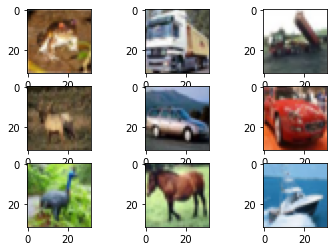

In [ ]:
# the first 9 images from training dataset by defining subplot
for x in range(9):
	#Using Subplot
	plt.subplot(330 + 1 + x)
 # plotting the  raw pixel data
	plt.imshow(X_train[x])
#figure is shown
plt.show()

In [ ]:
# We are doing data augmentation with the help of image preprocessing class
datagen = ImageDataGenerator() 
 # transformed training data
X_train_trans = [] 


# generating the new training data with the help of data augmentation
for z in range(len(X_train)):
   # We are randomly fliping the  images horizontally and adding them the list
  X_train_image = datagen.apply_transform(X_train[z], {'flip_horizontal':True}) 
  X_train_trans.append(X_train_image) 

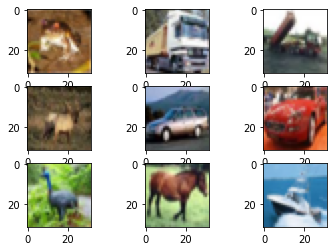

In [ ]:
# the first 9 images from the transformed dataset by defining subplot
for x in range(9):
	#Using Subplot
	plt.subplot(330 + 1 + x)
  # plotting the  raw pixel data
	plt.imshow(X_train_trans[x])
 #figure is shown
plt.show()

In [ ]:
# combining the  original training data with augmented data Set
X_train_new = np.append(X_train, X_train_trans, axis = 0) 
X_train_new.shape

(100000, 32, 32, 3)

In [ ]:
# adding the training data set twice to match the number of samples with x training data
y_train_new = np.append(y_train, y_train, axis = 0) 
y_train_new.shape

(100000, 1)

In [ ]:
## normalizeing the pixel value  between 0 and 1
X_train_new = X_train_new.astype('float32') / 255.0 
X_test = X_test.astype('float32') / 255.0

**Task 2**
Build a Deep Learning Neural Network model, train on the features and report the accuracy. Report your observations on the time taken on a CPU and GPU (with and without CuDNN kernel).
 

1.   Create a CNN based model with 4 hidden layers with 64, 128, 256,512 units in each successive layer.
2.  Create an LSTM based model with 1 LSTM layer with 256 units.




Task2: Part1: 

In [ ]:
# create a CNN based model
def create_model():
  #Which stack sequential layers in the network i.e input to otput in order
  model = tf.keras.models.Sequential()
  #Layer 1
  #Every Layer has a Batch Normalization, Conv2D, MaxPooling2d, and Dropout function.
  #Batch Normalization normalizes the input layer by adjusting and scaling the activations
  model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
  #This contains filter, kernel size, padding and activation
  #Displaying the no of hidden units, Displaying the dimensions of 2D-Array
  #Creates a convolution kernel Which is convolved with layer input to produce tensor of outputs.
  #Exponential Linear Unit i.e elu which will converges the cost and zeros faster
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
  #adding 2D max pooling layer in which we are specifing  the size of pool in x and y.
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  #This helps in regularizing the data and prevents overfitting
  model.add(tf.keras.layers.Dropout(0.25))

  #Below is the logic for remaining three layers with change in units i.e 128,256,512
  model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=X_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(512, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  #flattening  the output from the convolutional layers so that it will enter into fully connected layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
model = create_model() # creating the model which is defined above
model.compile( 
     # Now we are using the Adam optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,),
     # using the sparse categorical cross entropy for categorical class classification
    loss='sparse_categorical_crossentropy', 
    #Accuracy as metric
    metrics=['sparse_categorical_accuracy'])

In [ ]:
## fitting the model and calculating the time
import time
t0 = time.time()
model.fit(X_train_new, y_train_new, 
          batch_size=128, 
          epochs=17,
          steps_per_epoch=60,
          validation_data=(X_test, y_test),
          validation_freq=17) 
t1 = time.time()
timeTaken = t1-t0
print("time taken: " + str(timeTaken) + " seconds")

Epoch 1/17
60/60 [==============================] - 2s 32ms/step - loss: 2.9923 - sparse_categorical_accuracy: 0.2378
Epoch 2/17
60/60 [==============================] - 2s 32ms/step - loss: 2.1412 - sparse_categorical_accuracy: 0.3177
Epoch 3/17
60/60 [==============================] - 2s 32ms/step - loss: 2.0111 - sparse_categorical_accuracy: 0.3467
Epoch 4/17
60/60 [==============================] - 2s 32ms/step - loss: 1.8678 - sparse_categorical_accuracy: 0.3792
Epoch 5/17
60/60 [==============================] - 2s 32ms/step - loss: 1.7653 - sparse_categorical_accuracy: 0.3954
Epoch 6/17
60/60 [==============================] - 2s 32ms/step - loss: 1.6607 - sparse_categorical_accuracy: 0.4273
Epoch 7/17
60/60 [==============================] - 2s 32ms/step - loss: 1.5560 - sparse_categorical_accuracy: 0.4543
Epoch 8/17
60/60 [==============================] - 2s 32ms/step - loss: 1.4720 - sparse_categorical_accuracy: 0.4839
Epoch 9/17
60/60 [==============================] - 2s 3


*   The time taken  to run CNN model on CPU : 3595.4272 seconds
*   The time taken  to run CNN model on GPU : 42.67639 seconds



In [ ]:
#Calculating the Accuracy and loss for CNN model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.8988 - sparse_categorical_accuracy: 0.6970
Test loss: 0.8988378643989563
Test accuracy: 0.6970000267028809


Task2: Part 2:

In [ ]:
# Flattening the data and reshaping it to 3 dimensions inorder to pass it into LSTM Model
X_train_flatten = np.asarray(X_train_new.flatten()).reshape(100000,1,3072)
X_test_flatten = np.asarray(X_test.flatten()).reshape(10000,1,3072)

In [ ]:
#Shape of X_train_flatten
X_train_flatten.shape

(100000, 1, 3072)

In [ ]:
#Shape of X_train_flatten
X_test_flatten.shape

(10000, 1, 3072)

In [ ]:
batch_size = 256
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 3072   # Features

units = 256
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
  # CuDNN is only available at the layer level, and not at the cell level.
  # This means `LSTM(units)` will use the CuDNN kernel,
  # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
  if allow_cudnn_kernel:
    # The LSTM layer with default options uses CuDNN.
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(1, input_dim), dropout=0.2, recurrent_dropout=0.2, return_sequences=True)
  else:
    # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size, activation='softmax')]
  )
  return model

In [ ]:
#Creating the LSTM model instance and compiling it
model = build_model(allow_cudnn_kernel=True)

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
#Fitting the model and calculating the time taken
import time
t0 = time.time()
model.fit(X_train_flatten, y_train_new, 
          batch_size=128, 
          epochs=17,
          steps_per_epoch=60,
          validation_data=(X_test_flatten, y_test),
          validation_freq=17) 
t1 = time.time()
timeTaken = t1-t0
print("time taken: " + str(timeTaken) + " seconds")

Epoch 1/17
60/60 [==============================] - 1s 9ms/step - loss: 2.3482 - accuracy: 0.2207
Epoch 2/17
60/60 [==============================] - 1s 9ms/step - loss: 2.1392 - accuracy: 0.2777
Epoch 3/17
60/60 [==============================] - 1s 10ms/step - loss: 2.0478 - accuracy: 0.2943
Epoch 4/17
60/60 [==============================] - 1s 10ms/step - loss: 1.9899 - accuracy: 0.3118
Epoch 5/17
60/60 [==============================] - 1s 9ms/step - loss: 1.9354 - accuracy: 0.3228
Epoch 6/17
60/60 [==============================] - 1s 10ms/step - loss: 1.9162 - accuracy: 0.3309
Epoch 7/17
60/60 [==============================] - 1s 9ms/step - loss: 1.8592 - accuracy: 0.3453
Epoch 8/17
60/60 [==============================] - 1s 9ms/step - loss: 1.8305 - accuracy: 0.3566
Epoch 9/17
60/60 [==============================] - 1s 9ms/step - loss: 1.8537 - accuracy: 0.3517
Epoch 10/17
60/60 [==============================] - 1s 10ms/step - loss: 1.8066 - accuracy: 0.3604
Epoch 11/17
60/



*   The time taken to run LSTM model on CPU : 72.63285 seconds
*   The time taken to run LSTM model on GPU : 12.76826 seconds



In [ ]:
#Calculating the accuracy
scores = model.evaluate(X_test_flatten, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.6358 - accuracy: 0.4308
Test loss: 1.6358003616333008
Test accuracy: 0.4307999908924103


**Building the LSTM model without CuDNN kernel**

In [ ]:
#Now we are building the LSTM Model with out CuDNN kernel
slow_model = build_model(allow_cudnn_kernel=False)
slow_model.set_weights(model.get_weights())
slow_model.compile(loss='sparse_categorical_crossentropy', 
                   optimizer='sgd', 
                   metrics=['accuracy'])

In [ ]:
##Fitting the model and calculating the time taken
import time
t0 = time.time()
slow_model.fit(X_train_flatten, y_train_new, 
          batch_size=128, 
          epochs=17,
          steps_per_epoch=60,
          validation_data=(X_test_flatten, y_test),
          validation_freq=17) 
t1 = time.time()
timeTaken = t1-t0
print("time taken: " + str(timeTaken) + " seconds")

Epoch 1/17
60/60 [==============================] - 0s 6ms/step - loss: 1.6098 - accuracy: 0.4324
Epoch 2/17
60/60 [==============================] - 0s 7ms/step - loss: 1.6002 - accuracy: 0.4434
Epoch 3/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5865 - accuracy: 0.4491
Epoch 4/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5793 - accuracy: 0.4566
Epoch 5/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5793 - accuracy: 0.4482
Epoch 6/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5596 - accuracy: 0.4647
Epoch 7/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5790 - accuracy: 0.4525
Epoch 8/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5563 - accuracy: 0.4618
Epoch 9/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5889 - accuracy: 0.4422
Epoch 10/17
60/60 [==============================] - 0s 6ms/step - loss: 1.5453 - accuracy: 0.4587
Epoch 11/17
60/60 [



*   The time taken to run LSTM model on CPU : 39.3344 seconds
*   The time taken to run LSTM model on GPU : 8.0345 seconds
*   Accuracy is 0.4515





**TASK 3** \
(Bonus - you will have to do this by yourself) Run the LSTM solution on a TPU and report performance.

In [2]:
import os
try:
    device_name = os.environ['COLAB_TPU_ADDR']
    TPU_ADDRESS = 'grpc://' + device_name
    print('Found TPU at: {}'.format(TPU_ADDRESS))
except KeyError:
    print('TPU not found')

Found TPU at: grpc://10.9.172.178:8470


In [2]:
from keras.datasets import cifar10
# loading  the cifar10 data and spliting it into train,test
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 
print('X_train :', X_train.shape)

#Checking the shape of the data set
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'testing samples')

X_train : (50000, 32, 32, 3)
50000 training samples
10000 testing samples


In [3]:
# We are doing data augmentation with the help of image preprocessing class
datagen = ImageDataGenerator() 
 # transformed training data
X_train_trans = [] 


# generating the new training data with the help of data augmentation
for z in range(len(X_train)):
   # We are randomly fliping the  images horizontally and adding them the list
  X_train_image = datagen.apply_transform(X_train[z], {'flip_horizontal':True}) 
  X_train_trans.append(X_train_image) 

In [4]:
# combining the  original training data with augmented data Set
X_train_new = np.append(X_train, X_train_trans, axis = 0)
# adding the training data set twice to match the number of samples with x training data
y_train_new = np.append(y_train, y_train, axis = 0) 

In [5]:
## normalizeing the pixel value  between 0 and 1
X_train_new = X_train_new.astype('float32') / 255.0 
X_test = X_test.astype('float32') / 255.0

In [6]:
# Flattening the data and reshaping it to 3 dimensions inorder to pass it into LSTM Model
X_train_flatten = np.asarray(X_train_new.flatten()).reshape(100000,1,3072)
X_test_flatten = np.asarray(X_test.flatten()).reshape(10000,1,3072)

In [7]:
#Shape of X_train_flatten
X_train_flatten.shape

(100000, 1, 3072)

In [8]:
#Shape of X_train_flatten
X_test_flatten.shape

(10000, 1, 3072)

In [12]:
batch_size = 256
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 3072   # Features

units = 256
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=False):
  # CuDNN is only available at the layer level, and not at the cell level.
  # This means `LSTM(units)` will use the CuDNN kernel,
  # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
  if allow_cudnn_kernel:
    # The LSTM layer with default options uses CuDNN.
    lstm_layer = tf.keras.layers.LSTM(units, input_shape=(1, input_dim), dropout=0.2, recurrent_dropout=0.2, return_sequences=True)
  else:
    # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units),
        input_shape=(None, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size, activation='softmax')]
  )
  return model

In [13]:
#Constructing a model on TPU and compiling it.
import os

tf.debugging.set_log_device_placement(True)

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu = 'grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

with strategy.scope():
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])
  


INFO:tensorflow:Initializing the TPU system: grpc://10.9.172.178:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.9.172.178:8470


Executing op __inference__tpu_init_fn_6802 on task /job:worker/replica:0/task:0/device:TPU_SYSTEM:0
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Executing op VarHandleOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op VarIsInitializedOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op LogicalNot on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Assert on task /job:worker/replica:0/task:0/device:TPU:0
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op VarHandleOp on task /job:worker/replica:0/task:0/device:TPU:1
Executing op VarIsInitializedOp on task /job:worker/replica:0/task:0/device:TPU:1
Executing op LogicalNot on task /job:worker/replica:0/task:0/device:TPU:1
Executing op Assert on task /job:worker/replica:0/task:0/device:TPU:1
Executing op AssignVariableOp on task /job:worker/replica:0/task:0/device:TPU:1
Executing op VarHandleOp on task /job:worker/replica:0/task:0/device:TPU:2
Executing op VarIsInitializedOp on task /job:worker/replica:0/task:0/device:TPU:2
Executing op LogicalNot on task /job:worker/replica:0/task:0/device:TPU:2
Executi

In [14]:
#Fitting the model and calculating the time taken
import time
t0 = time.time()
model.fit(
    X_train_flatten.astype(np.float32), y_train_new.astype(np.float32),
    epochs=17,
    steps_per_epoch=60,
    validation_data=(X_test_flatten.astype(np.float32), y_test.astype(np.float32))
)
t1 = time.time()
timeTaken = t1-t0
print("time taken: " + str(timeTaken) + " seconds")

Executing op ReadVariableOp on task /job:worker/replica:0/task:0/device:TPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op Identity on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RangeDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RepeatDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op MapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op TensorDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op RepeatDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ZipDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op MapDataset on task /job:worker/replica:0/task:0/device:CPU:0
Executin

Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
 4/60 [=>............................] - ETA: 14s - loss: 2.4879 - accuracy: 0.1674Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
 7/60 [==>...........................] - ETA: 8s - loss: 2.3710 - accuracy: 0.1895 Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_11846 on task /job:worker/replica:0/task:0/device:CPU:0
10/60 [====>.........................] - ETA: 5s - loss: 2.3007 - 

Streaming output truncated to the last 5000 lines.
Executing op MakeIterator on task /job:worker/replica:0/task:0/device:TPU:4
Executing op GeneratorDataset on task /job:worker/replica:0/task:0/device:TPU:5
Executing op PrefetchDataset on task /job:worker/replica:0/task:0/device:TPU:5
Executing op AnonymousIteratorV2 on task /job:worker/replica:0/task:0/device:TPU:5
Executing op MakeIterator on task /job:worker/replica:0/task:0/device:TPU:5
Executing op GeneratorDataset on task /job:worker/replica:0/task:0/device:TPU:6
Executing op PrefetchDataset on task /job:worker/replica:0/task:0/device:TPU:6
Executing op AnonymousIteratorV2 on task /job:worker/replica:0/task:0/device:TPU:6
Executing op MakeIterator on task /job:worker/replica:0/task:0/device:TPU:6
Executing op GeneratorDataset on task /job:worker/replica:0/task:0/device:TPU:7
Executing op PrefetchDataset on task /job:worker/replica:0/task:0/device:TPU:7
Executing op AnonymousIteratorV2 on task /job:worker/replica:0/task:0/device:T

*   The time taken to run LSTM model on TPU : 142.85948 seconds
*   Accuracy is 0.4650